## Exploratory Data Analysis Starter

## Import packages

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Shows plots in jupyter notebook
%matplotlib inline


# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [ ]:
client_df = pd.read_csv('/content/sample_data/client_data.csv')
price_df = pd.read_csv('/content/sample_data/price_data.csv')

In [ ]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


# Feature description of client_df dataset
*	id = client company identifier
*	activity_new = category of the company’s activity
*	channel_sales = code of the sales channel
*	cons_12m = electricity consumption of the past 12 months
*	cons_gas_12m = gas consumption of the past 12 months
*	cons_last_month = electricity consumption of the last month
*	date_activ = date of activation of the contract
*	date_end = registered date of the end of the contract
*	date_modif_prod = date of the last modification of the product
*	date_renewal = date of the next contract renewal
*	forecast_cons_12m = forecasted electricity consumption for next 12 months
*	forecast_cons_year = forecasted electricity consumption for the next calendar year
*	forecast_discount_energy = forecasted value of current discount
*	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
*	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
* forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
*	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
*	has_gas = indicated if client is also a gas client
*	imp_cons = current paid consumption
*	margin_gross_pow_ele = gross margin on power subscription
*	margin_net_pow_ele = net margin on power subscription
*	nb_prod_act = number of active products and services
*	net_margin = total net margin
*	num_years_antig = antiquity of the client (in number of years)
* origin_up = code of the electricity campaign the customer first subscribed to
*	pow_max = subscribed power
*	churn = has the client churned over the next 3 months


In [ ]:
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


# Feature Description of price_df Dataset

*	id = client company identifier
*	price_date = reference date
*	price_off_peak_var = price of energy for the 1st period (off peak)
*	price_peak_var = price of energy for the 2nd period (peak)
*	price_mid_peak_var = price of energy for the 3rd period (mid peak)
*	price_off_peak_fix = price of power for the 1st period (off peak)
*	price_peak_fix = price of power for the 2nd period (peak)
*	price_mid_peak_fix = price of power for the 3rd period (mid peak)


In [ ]:
len(price_df['id'].unique())

16096

In [ ]:
price_df['id'].unique()

array(['038af19179925da21a25619c5a24b745',
       '31f2ce549924679a3cbb2d128ae9ea43',
       '36b6352b4656216bfdb96f01e9a94b4e', ...,
       'd00da2c0c568614b9937791f681cd7d7',
       '045f94f0b7f538a8d8fae11080abb5da',
       '16f51cdc2baa19af0b940ee1b3dd17d5'], dtype=object)

* There are 16096 unique customer id in price_id dataset

---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [ ]:
client_df.shape

(14606, 26)

In [ ]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

* The client_df consists of columns namely id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
* There are 14606 rows and 26 columns where 8 columns are object datatype,7 are int datatype and remaining all are float datatype in client_df.
* No null values are present in dataset

In [ ]:
price_df.shape

(193002, 8)

In [ ]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


* The price_df dataset consists of columns namely id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
* There are 193002 rows and 8 columns where 2 columns are object datatype and remaining all are float datatype.
* No null values are present in dataset

### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [ ]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


* Most of the columns having mean>median which means data is **not uniformly distributed ( skewed towards right )** and may also contain some outliers
* Columns forecast_price_energy_off_peak,forecast_price_pow_off_peak,num_years_acting are having mean=median(mean and median are almost)which the data is **uniformly distributed**

In [ ]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [ ]:
churn_customer=client_df[client_df['churn']==1]['id'].values
churn_customer

array(['24011ae4ebbe3035111d65fa7c15bc57',
       '1aa498825382410b098937d65c4ec26d',
       '7ab4bf4878d8f7661dfc20e9b8e18011', ...,
       'c525fcb0860e5705d37743f5b5cadbfe',
       'd0a6f71671571ed83b2645d23af6de00',
       '10e6828ddd62cbcf687cb74928c4c2d2'], dtype=object)

In [ ]:
len(churn_customer)

1419

In [ ]:
client_df[client_df['churn']==1].head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,f,181.21,33.12,33.12,1,118.89,4,lxidpiddsbxsbosboudacockeimpuepw,13.200,1
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,f,0.00,4.04,4.04,1,346.63,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,1
25,389bbbe70248fbeecdf9bb1bd0d1da04,foosdfpfkusacimwkcsosbicdxkicaua,3584,0,322,2010-11-17,2016-11-17,2010-11-17,2015-11-18,379.83,...,f,32.61,57.72,57.72,1,38.76,5,lxidpiddsbxsbosboudacockeimpuepw,23.100,1
30,44e826a55734d0ca5eeafcae0e991a75,foosdfpfkusacimwkcsosbicdxkicaua,324,0,0,2009-07-07,2016-07-07,2015-05-23,2015-07-09,8.32,...,f,0.00,18.62,18.62,2,1.27,7,ldkssxwpmemidmecebumciepifcamkci,13.200,1


# There are 1419 customers who are at the risk of Churn out of 14606 customers (9.7 %)

Text(0.5, 1.0, 'Distribution of target variable-churn')

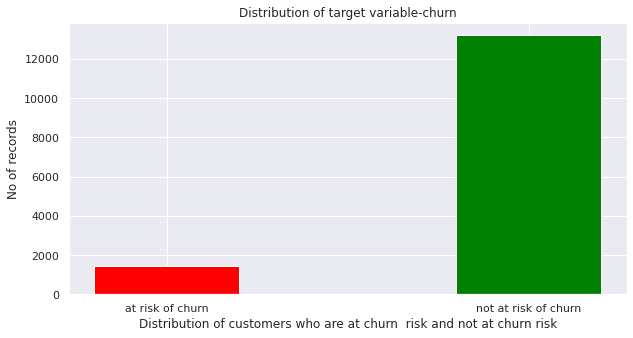

In [ ]:
fig=plt.figure(figsize=(10,5))
plt.bar(['at risk of churn','not at risk of churn'],[len(client_df[client_df['churn']==1]),len(client_df[client_df['churn']==0])],color=['red','green'],width=0.4)
plt.xlabel('Distribution of customers who are at churn  risk and not at churn risk')
plt.ylabel('No of records')
plt.title('Distribution of target variable-churn')

# Creating new Dataset for comparing customer's forecasted and actual prices and also for analysing customer's energy and power prices variations in a year

In [ ]:
first_period_energy_price=[]
for i in client_df['id'].values:
  record_len=len(price_df[price_df['id']==i])
  first_period_energy_price.append(1 if price_df[price_df['id']==i]['price_off_peak_var'].values[record_len-1]>price_df[price_df['id']==i]['price_off_peak_var'].values[0] else 0)

In [ ]:
second_period_energy_price=[]
for i in client_df['id'].values:
  record_len=len(price_df[price_df['id']==i])
  second_period_energy_price.append(1 if price_df[price_df['id']==i]['price_peak_var'].values[record_len-1]>price_df[price_df['id']==i]['price_peak_var'].values[0] else 0)

In [ ]:
third_period_energy_price=[]
for i in client_df['id'].values:
  record_len=len(price_df[price_df['id']==i])
  third_period_energy_price.append(1 if price_df[price_df['id']==i]['price_mid_peak_var'].values[record_len-1]>price_df[price_df['id']==i]['price_mid_peak_var'].values[0] else 0)

In [ ]:
first_period_power_price=[]
for i in client_df['id'].values:
  record_len=len(price_df[price_df['id']==i])
  first_period_power_price.append(1 if price_df[price_df['id']==i]['price_off_peak_fix'].values[record_len-1]>price_df[price_df['id']==i]['price_off_peak_fix'].values[0] else 0)

In [ ]:
second_period_power_price=[]
for i in client_df['id'].values:
  record_len=len(price_df[price_df['id']==i])
  second_period_power_price.append(1 if price_df[price_df['id']==i]['price_peak_fix'].values[record_len-1]>price_df[price_df['id']==i]['price_peak_fix'].values[0] else 0)

In [ ]:
third_period_power_price=[]
for i in client_df['id'].values:
  record_len=len(price_df[price_df['id']==i])
  third_period_power_price.append(1 if price_df[price_df['id']==i]['price_mid_peak_fix'].values[record_len-1]>price_df[price_df['id']==i]['price_mid_peak_fix'].values[0] else 0)

In [ ]:
first_period_forecasted_energy_price=[]
for i in client_df['id'].values:
  record_len=len(price_df[price_df['id']==i])
  first_period_forecasted_energy_price.append(1 if price_df[price_df['id']==i]['price_off_peak_var'].values[record_len-1]>client_df[client_df['id']==i]['forecast_price_energy_off_peak'].values[0] else 0)

In [ ]:
second_period_forecasted_energy_price=[]
for i in client_df['id'].values:
  record_len=len(price_df[price_df['id']==i])
  second_period_forecasted_energy_price.append(1 if price_df[price_df['id']==i]['price_peak_var'].values[record_len-1]>client_df[client_df['id']==i]['forecast_price_energy_peak'].values[0] else 0)

In [ ]:
first_period_forecasted_power_price=[]
for i in client_df['id'].values:
  record_len=len(price_df[price_df['id']==i])
  first_period_forecasted_power_price.append(1 if price_df[price_df['id']==i]['price_off_peak_fix'].values[record_len-1]>client_df[client_df['id']==i]['forecast_price_pow_off_peak'].values[0] else 0)

In [ ]:
price_analysis_dataset=pd.DataFrame({'id':client_df['id'].values,'is First period Energy Price increased':first_period_energy_price,'is Second Period Energy Price increased':second_period_energy_price,'is Third Period Energy Price increased':third_period_energy_price,'is First period power price increased':first_period_power_price,'is Second period power price increased':second_period_power_price,'is Third period power price increased':third_period_power_price,'First period Energy Price Estimation Not Match':first_period_forecasted_energy_price,'Second period Energy Price Estimation Not Match':second_period_forecasted_energy_price,'First period Power Price Estimation Not Match':first_period_forecasted_power_price,'churn':client_df['churn'].values})

In [ ]:
price_analysis_dataset

,id,is First period Energy Price increased,is Second Period Energy Price increased,is Third Period Energy Price increased,is First period power price increased,is Second period power price increased,is Third period power price increased,First period Energy Price Estimation Not Match,Second period Energy Price Estimation Not Match,First period Power Price Estimation Not Match,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1,0,0,1,0,0,1,0,1,1
1,d29c2c54acc38ff3c0614d0a653813dd,0,0,0,1,0,0,1,0,1,0
2,764c75f661154dac3a6c254cd082ea7d,0,1,0,1,0,0,1,1,1,0
3,bba03439a292a1e166f80264c16191cb,0,0,0,1,0,0,1,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,0,0,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,0,0,0,1,0,0,1,0,1,0
14602,d0a6f71671571ed83b2645d23af6de00,0,0,1,1,1,1,1,1,1,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,0,0,1,1,1,1,1,1,1,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,0,0,0,1,0,0,1,0,1,0


* price_analysis_dataset consists of 14606 rows and 11 columns
* It consists of columns namely id,is First period Energy Price increased,is Second Period Energy Price increased,is Third Period Energy Price increased,is First period power price increased,is Second period power price increased,is Third period energy price increased,First period Energy Price Estimation Match,Second period Energy Price Estimation Match,First period Power Price Estimation Match,churn

# Description of newly created price_analysis_dataset Features

* id=client company identifier
* is First period Energy Price increased=Represented in boolean form(1 or 0) whether Energy Price of the First Period for the particular customer is increased or not
* is Second Period Energy Price increased=Represented in boolean form(1 or 0) whether Energy Price of the Second Period for the particular customer is increased or not
* is Third Period Energy Price increased=Represented in boolean form(1 or 0) whether Energy Price of the Third Period for the particular customer is increased or not
* is First period power price increased=Represented in boolean form(1 or 0) whether power Price of the First Period for the particular customer is increased or not
* is Second period power price increased=Represented in boolean form(1 or 0) whether power Price of the Second Period for the particular customer is increased or not
* is Third period power price increased=Represented in boolean form(1 or 0) whether power Price of the Third Period for the particular customer is increased or not
* First period Energy Price Estimation Match=Identifies whether Energy Price Estimation for the first period of the particular customer matched with actual price or not with values 1 or 0
* Second period Energy Price Estimation Match=represents whether Energy Price Estimation for second period of customer matches with actual price or not
* First period Power Price Estimation Match=represents whether Power Price Estimation for First period of customer matches with actual price or not
* churn = has the client churned over the next 3 months

# Data Visualisation of price_analysis_dataset

# Comparing how many customer estimated prices matched with actual prices of Power and Energy with the not matching cases

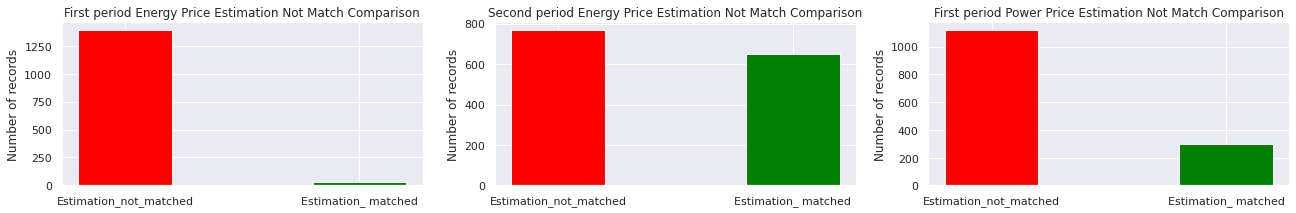

In [ ]:
fig=plt.figure(figsize=(22,3))
for i in range(len(price_analysis_dataset.columns[7:10])):
  plt.subplot(1,3,i+1)
  plt.bar(['Estimation_not_matched','Estimation_ matched'],[len(price_analysis_dataset[(price_analysis_dataset[price_analysis_dataset.columns[i+7]]==1) & (price_analysis_dataset['churn']==1)]),len(price_analysis_dataset[(price_analysis_dataset[price_analysis_dataset.columns[i+7]]==0) & (price_analysis_dataset['churn']==1)])],color=['red','green'],width=0.4)
  plt.ylabel('Number of records')
  plt.title(price_analysis_dataset.columns[i+7]+' Comparison')
plt.show()

# Checking how many customer's Energy and Power prices increased and not increased in a year for various periods

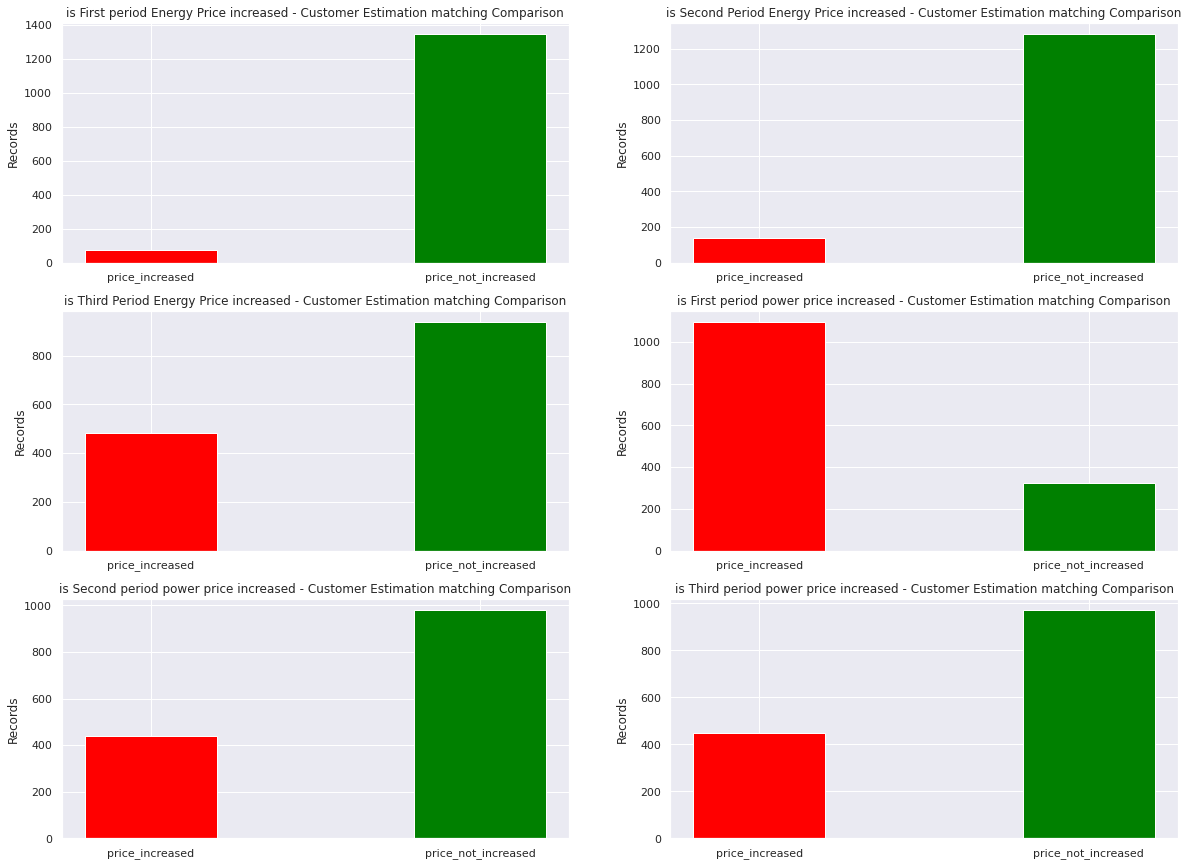

In [ ]:
fig=plt.figure(figsize=(20,15))
for i in range(len(price_analysis_dataset.columns[1:7])):
  plt.subplot(3,2,i+1)
  plt.bar(['price_increased','price_not_increased'],[len(price_analysis_dataset[(price_analysis_dataset[price_analysis_dataset.columns[i+1]]==1) & (price_analysis_dataset['churn']==1)]),len(price_analysis_dataset[(price_analysis_dataset[price_analysis_dataset.columns[i+1]]==0) & (price_analysis_dataset['churn']==1)])],color=['red','green'],width=0.4)
  plt.ylabel('Records')
  plt.title(price_analysis_dataset.columns[i+1]+' - Customer Estimation matching Comparison')
plt.show()

In [ ]:
price_analysis_dataset.columns[1:-1]

Index(['is First period Energy Price increased',
       'is Second Period Energy Price increased',
       'is Third Period Energy Price increased',
       'is First period power price increased',
       'is Second period power price increased',
       'is Third period power price increased',
       'First period Energy Price Estimation Not Match',
       'Second period Energy Price Estimation Not Match',
       'First period Power Price Estimation Not Match'],
      dtype='object')

# Barplot for number of end year increased prices of Energy and Power in various periods for churn customers

Text(0.5, 1.0, 'churn case customers price_data analysis')

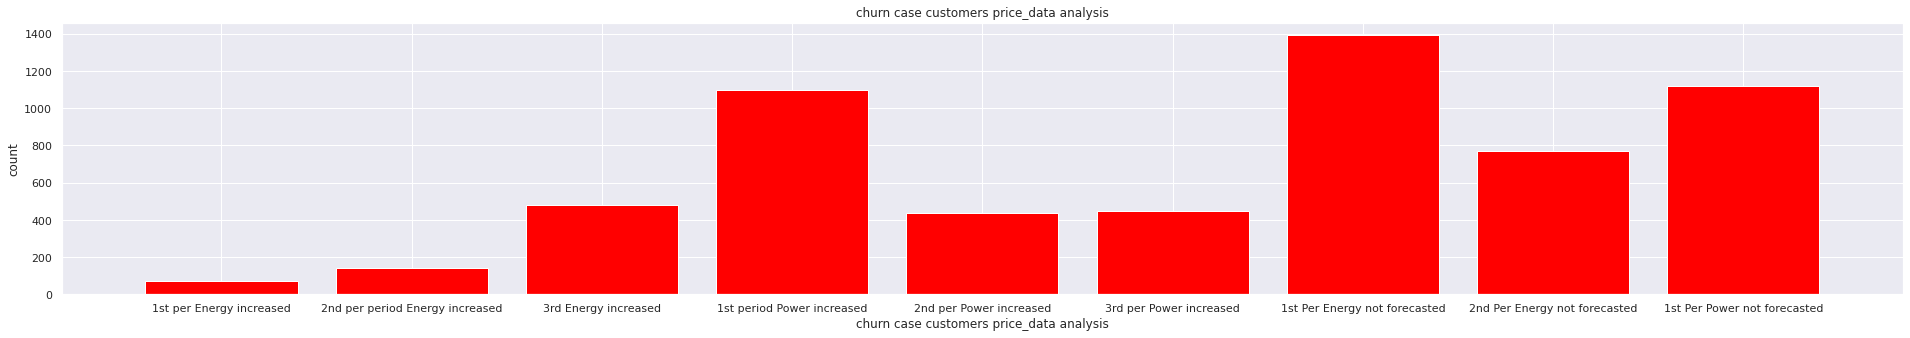

In [ ]:
fig=plt.figure(figsize=(33,5))
plt.bar(['1st per Energy increased','2nd per period Energy increased','3rd Energy increased','1st period Power increased','2nd per Power increased','3rd per Power increased','1st Per Energy not forecasted','2nd Per Energy not forecasted','1st Per Power not forecasted'],[len(price_analysis_dataset[(price_analysis_dataset['churn']==1)&(price_analysis_dataset['is First period Energy Price increased']==1)]),len(price_analysis_dataset[(price_analysis_dataset['churn']==1)&(price_analysis_dataset['is Second Period Energy Price increased']==1)]),len(price_analysis_dataset[(price_analysis_dataset['churn']==1)&(price_analysis_dataset['is Third Period Energy Price increased']==1)]),len(price_analysis_dataset[(price_analysis_dataset['churn']==1)&(price_analysis_dataset['is First period power price increased']==1)]),len(price_analysis_dataset[(price_analysis_dataset['churn']==1)&(price_analysis_dataset['is Second period power price increased']==1)]),len(price_analysis_dataset[(price_analysis_dataset['churn']==1)&(price_analysis_dataset['is Third period power price increased']==1)]),len(price_analysis_dataset[(price_analysis_dataset['churn']==1)&(price_analysis_dataset['First period Energy Price Estimation Not Match']==1)]),len(price_analysis_dataset[(price_analysis_dataset['churn']==1)&(price_analysis_dataset['Second period Energy Price Estimation Not Match']==1)]),len(price_analysis_dataset[(price_analysis_dataset['churn']==1)&(price_analysis_dataset['First period Power Price Estimation Not Match']==1)])],color='red')
plt.xlabel('churn case customers price_data analysis')
plt.ylabel('count')
plt.title('churn case customers price_data analysis')

# Correlation of variables in newly created price_analysis_dataset

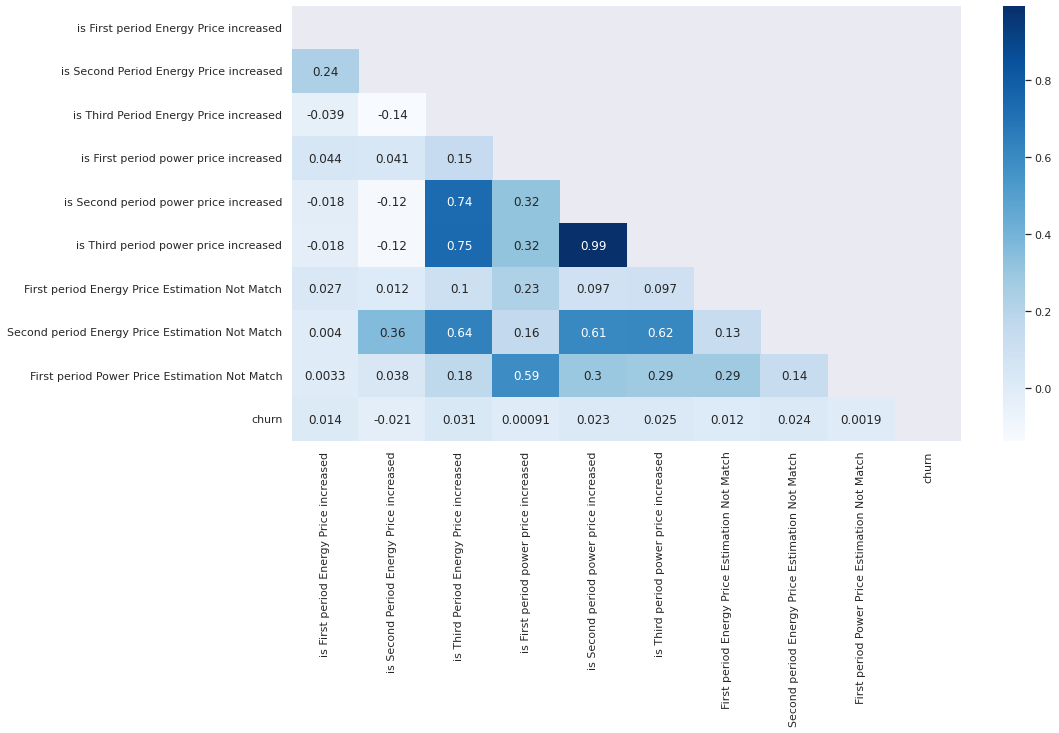

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
mask=np.triu(np.ones_like(price_analysis_dataset.corr()))
dataplot=sns.heatmap(price_analysis_dataset.corr(),annot=True,mask=mask,cmap='Blues')
sns.set_style('white')
plt.show()

# Data Visualisation of client_df dataset

# Distributions of features in client_df by comparing  churn(churn=1) and not churn(churn=0)  cases

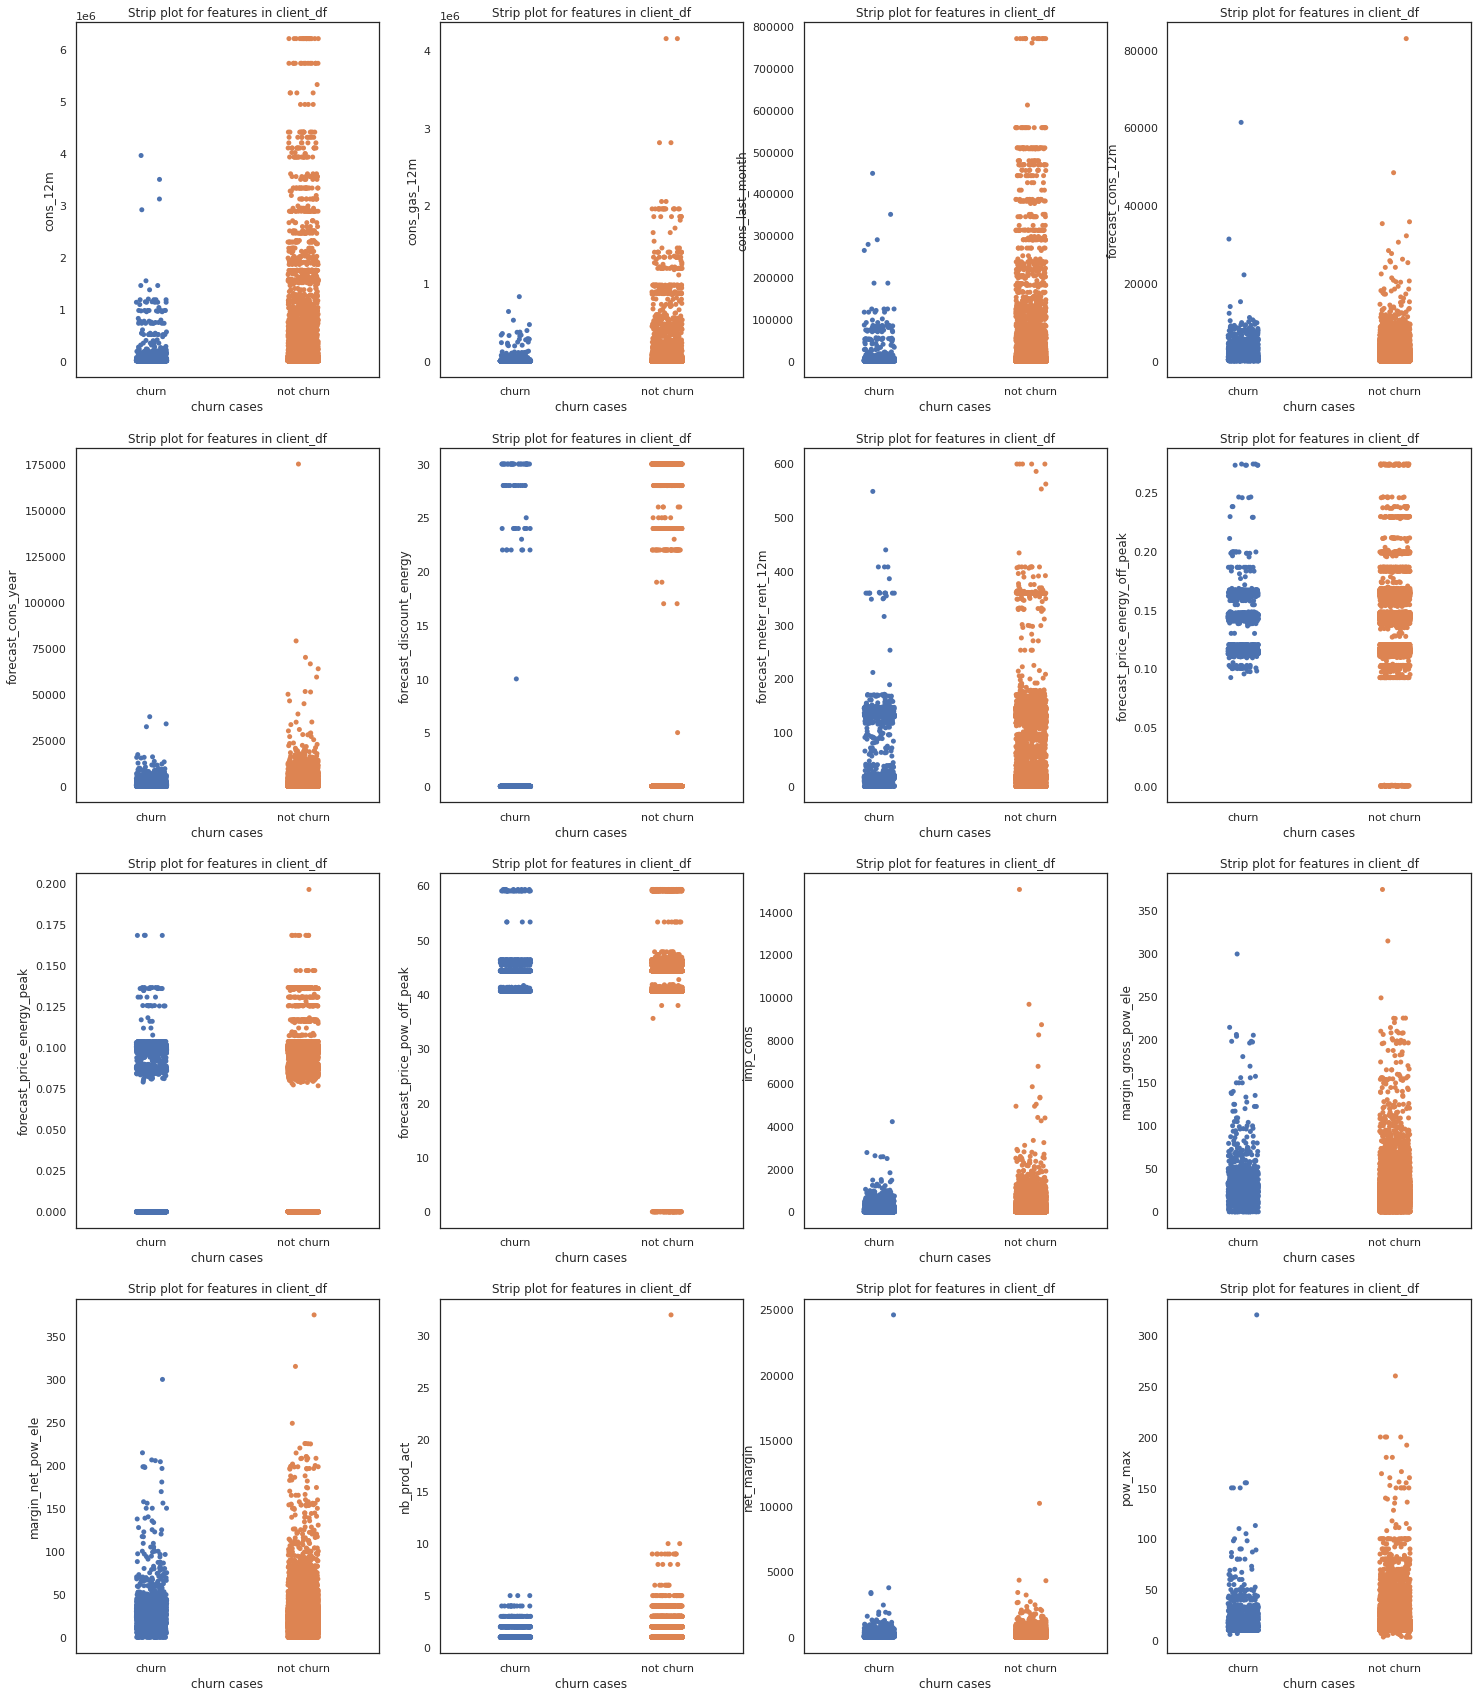

In [ ]:
import seaborn as sns
dummy=pd.DataFrame()
dummy['churn cases']=client_df['churn'].apply(lambda x:'churn' if x==1 else 'not churn')
features=['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak','imp_cons','margin_gross_pow_ele','margin_net_pow_ele','nb_prod_act','net_margin','pow_max']
fig=plt.figure(figsize=(25,30))
for i in range(len(features)):
  dummy[features[i]]=client_df[features[i]]
  plt.subplot(4,4,i+1)
  sns.stripplot(x='churn cases',y=features[i],jitter=True,data=dummy).set_title('Strip plot for features in client_df')
plt.show()

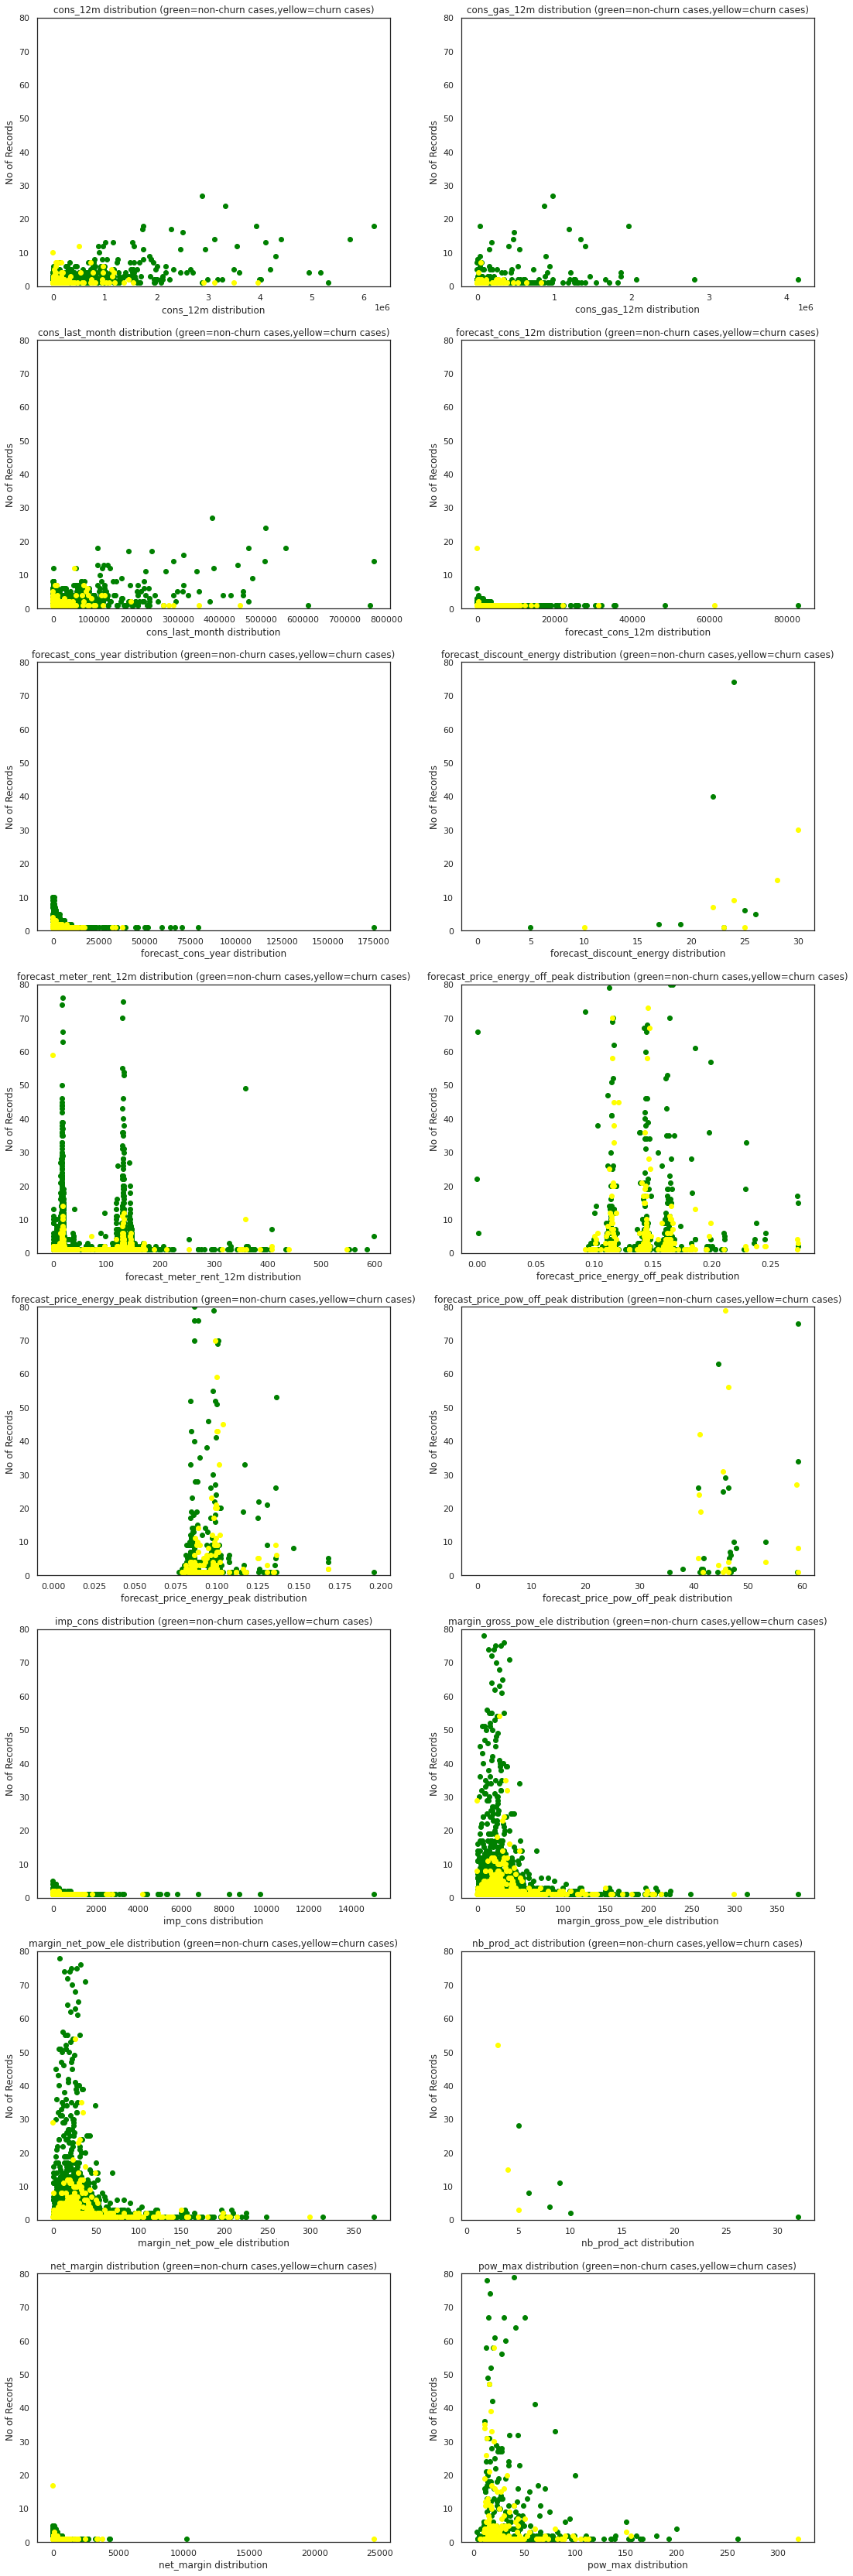

In [ ]:
features=['cons_12m','cons_gas_12m','cons_last_month','forecast_cons_12m','forecast_cons_year','forecast_discount_energy','forecast_meter_rent_12m','forecast_price_energy_off_peak','forecast_price_energy_peak','forecast_price_pow_off_peak','imp_cons','margin_gross_pow_ele','margin_net_pow_ele','nb_prod_act','net_margin','pow_max']
fig=plt.figure(figsize=(18,60))
for i in range(len(features)):
  plt.subplot(8,2,i+1)
  plt.scatter(client_df[client_df['churn']==0][features[i]].value_counts().keys(),client_df[client_df['churn']==0][features[i]].value_counts().values,color='green')
  plt.scatter(client_df[client_df['churn']==1][features[i]].value_counts().keys(),client_df[client_df['churn']==1][features[i]].value_counts().values,color='yellow')
  plt.ylim(0,80)
  plt.xlabel(features[i]+' distribution')
  plt.ylabel('No of Records')
  plt.title(features[i]+' distribution (green=non-churn cases,yellow=churn cases)')
plt.show()


# Checking whether the customer having gas or not for those who are at the churn risk

Text(0.5, 1.0, 'Comparing the customer at the risk of churn who are having gas and not having gas ')

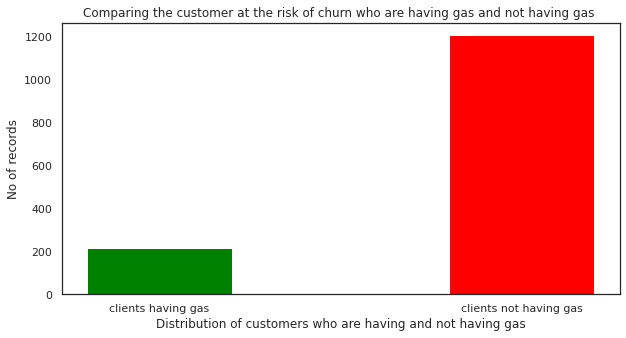

In [ ]:
client_df['has_gas']=client_df['has_gas'].apply(lambda val: 1 if val=='t' else 0)
fig=plt.figure(figsize=(10,5))
plt.bar(['clients having gas','clients not having gas'],[len(client_df[(client_df['has_gas']==1) & (client_df['churn']==1)]),len(client_df[(client_df['has_gas']==0) & (client_df['churn']==1)])],color=['green','red'],width=0.4)
plt.xlabel('Distribution of customers who are having and not having gas')
plt.ylabel('No of records')
plt.title('Comparing the customer at the risk of churn who are having gas and not having gas ')

# Distribution of antiquity of clients in years for those who are at risk of churn

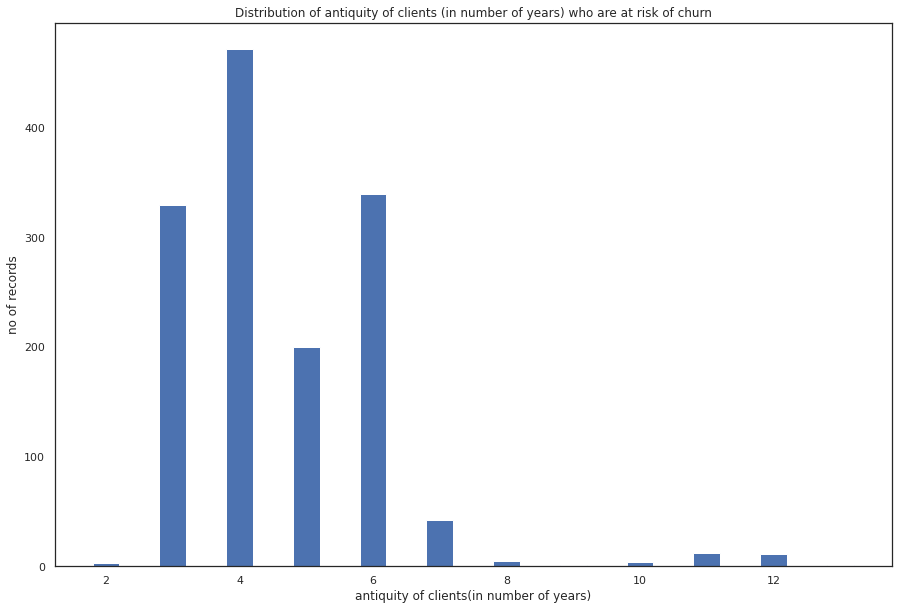

In [ ]:
fig=plt.figure(figsize=(15,10))
client_df1=client_df[client_df['churn']==1]
plt.bar(client_df1['num_years_antig'].value_counts().index,client_df1['num_years_antig'].value_counts().values,0.4)
plt.xlabel('antiquity of clients(in number of years)')
plt.ylabel('no of records')
plt.title('Distribution of antiquity of clients (in number of years) who are at risk of churn')
plt.show()

# Distribution of code of the Electricity campaign which the customer subscribed and also at the risk of churn

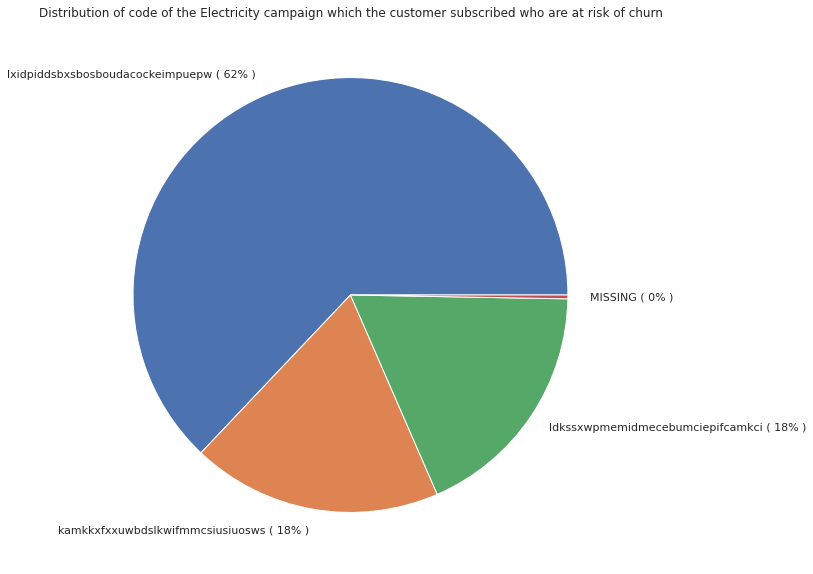

In [ ]:
fig=plt.figure(figsize=(15,10))
label_list=[]
label_churn_list=[]
for i in client_df['origin_up'].unique():
  if len(client_df[(client_df['origin_up']==i) & (client_df['churn']==1)])>0:
    label_churn_list.append(i+' ( '+str(int(len(client_df[(client_df['origin_up']==i) & (client_df['churn']==1)])/len(client_df[client_df['churn']==1])*100))+'% )')
client_df1=client_df[client_df['churn']==1]
plt.pie(client_df1['origin_up'].value_counts().values,labels=label_churn_list)
plt.title('Distribution of code of the Electricity campaign which the customer subscribed who are at risk of churn')
plt.show()

# Correlation of variables in client_df dataset

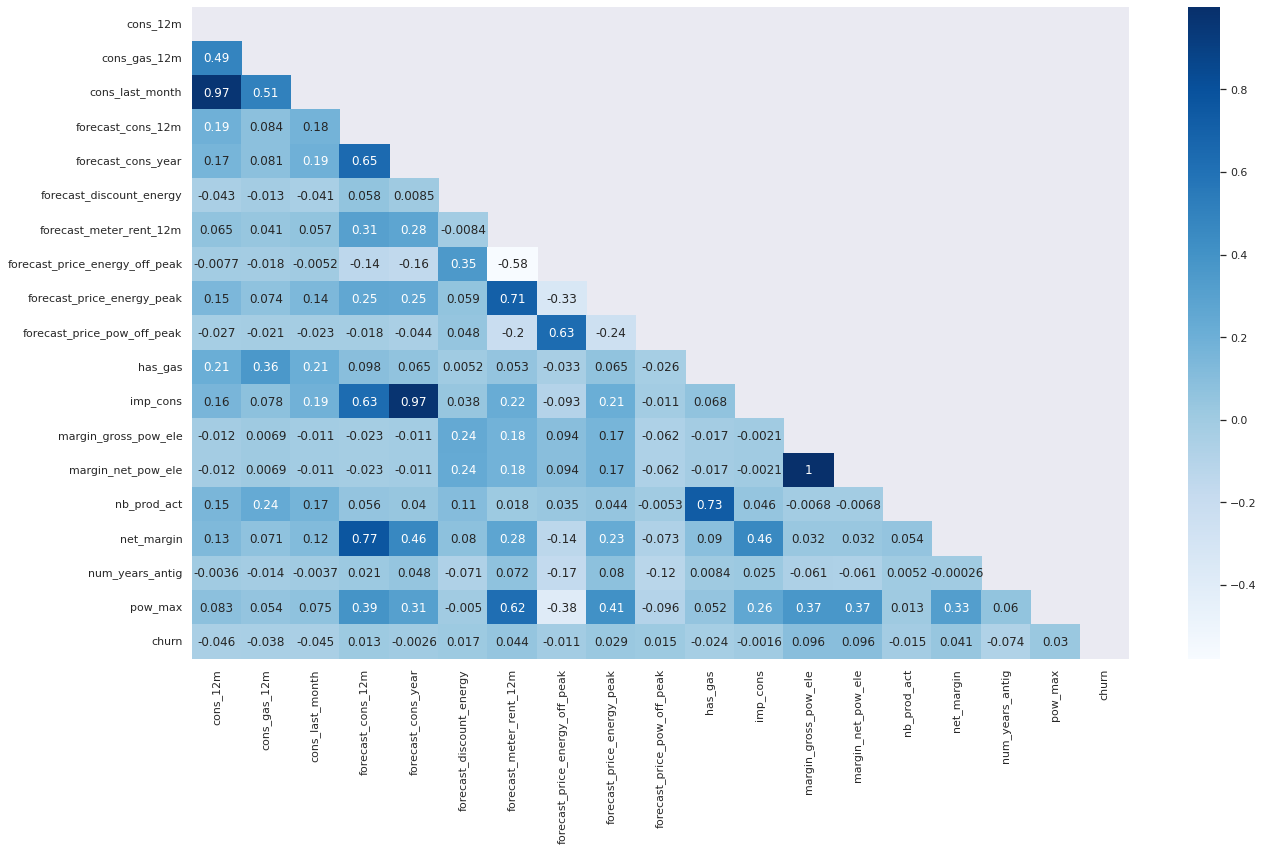

In [ ]:
sns.set(rc={'figure.figsize':(21,12)})
mask=np.triu(np.ones_like(client_df.corr()))
dataplot=sns.heatmap(client_df.corr(),annot=True,mask=mask,cmap='Blues')
sns.set_style('white')
plt.show()

# Adding churn feature to Price dataset

In [ ]:
for i in price_df['id'].unique():
  if i not in client_df['id'].values:
    price_df=price_df[price_df['id']!=i]
churn=[]
for i in price_df['id'].values:
  churn.append(client_df[client_df['id']==i]['churn'].values[0])
price_df['churn']=churn

# Churn customers monthly prices of Energy and Power in different periods

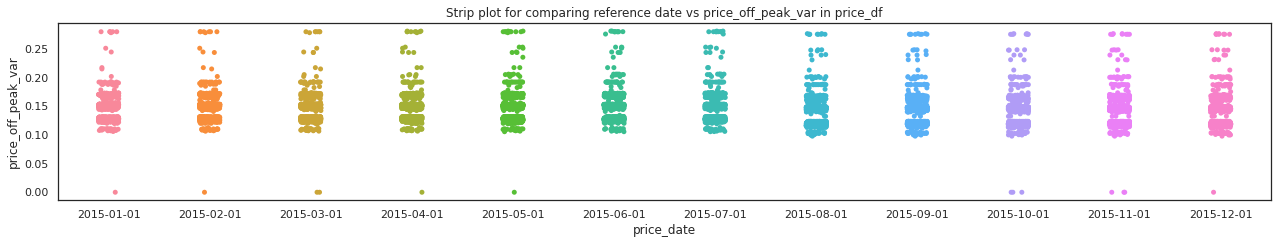

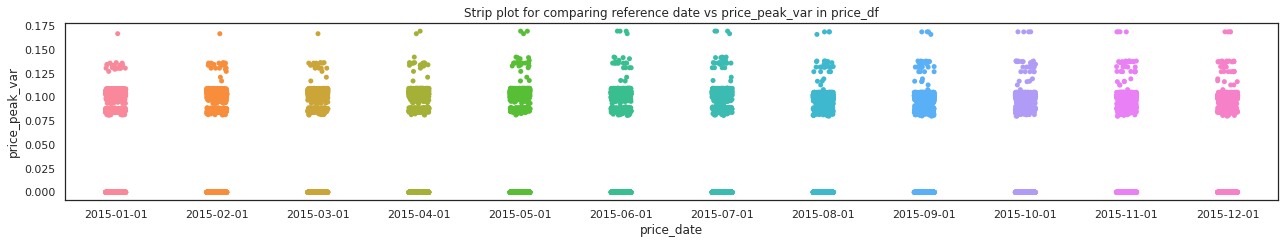

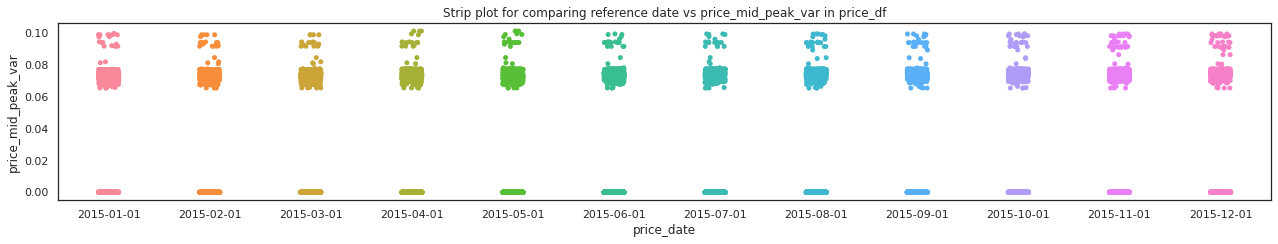

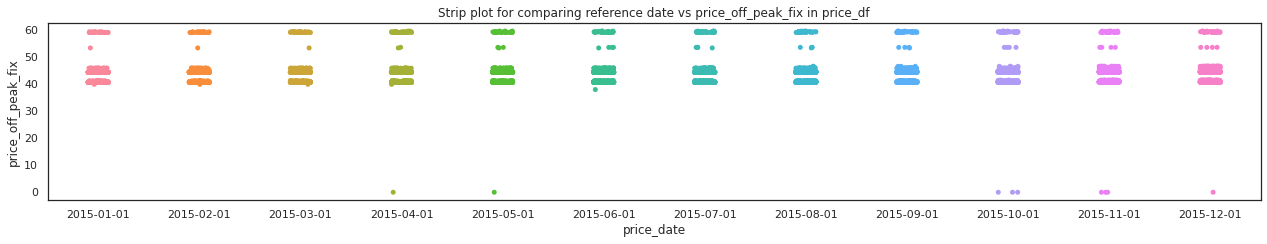

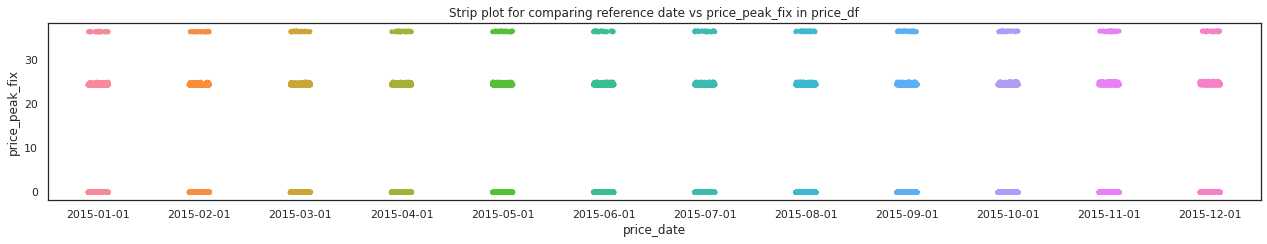

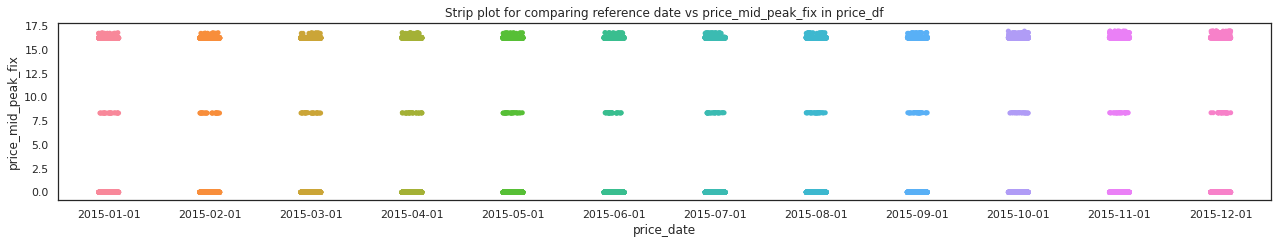

In [ ]:
dummy=price_df[price_df['churn']==1]
for i in range(len(price_df.columns[2:-1])):
  fig=plt.figure(figsize=(100,15))
  plt.subplot(4,4,i+1)
  sns.stripplot(x='price_date',y=price_df.columns[i+2],jitter=True,data=dummy).set_title('Strip plot for comparing reference date vs '+price_df.columns[i+2]+' in price_df')
  plt.show()

# Number of records having for each month in Price dataset

Text(0.5, 1.0, 'count plot of customers in each reference date')

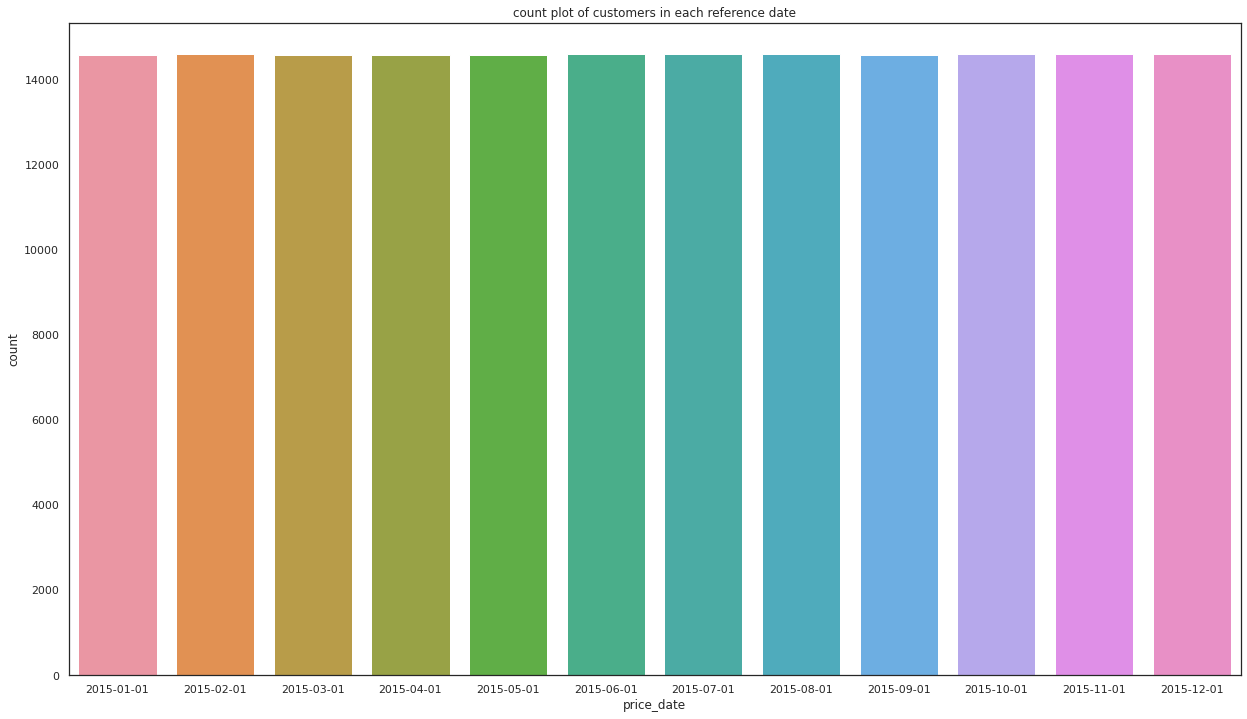

In [ ]:
sns.countplot(x=price_df['price_date'],data=price_df).set_title('count plot of customers in each reference date')

# Adding churn feature in price_df dataset for analysing correlations

# Correlation of features in price_df dataset

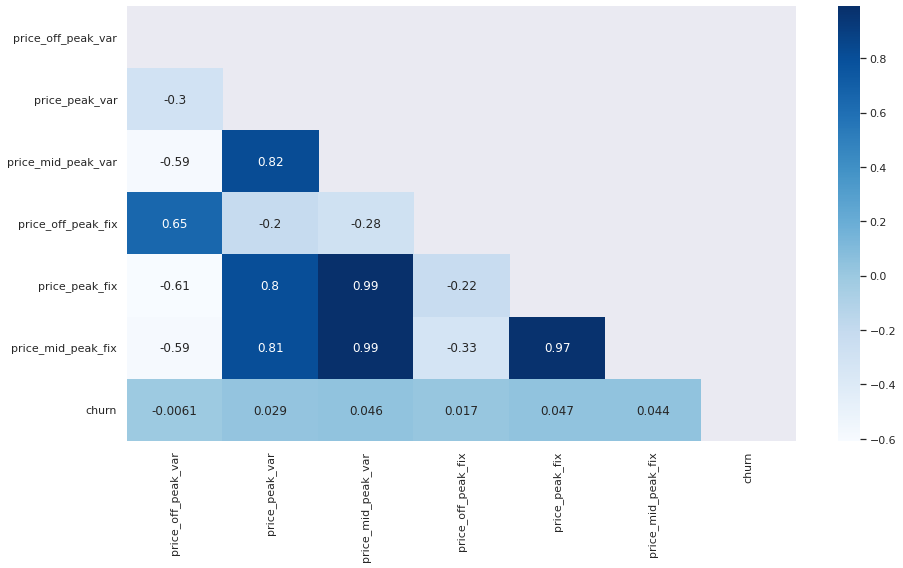

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
mask=np.triu(np.ones_like(price_df.corr()))
dataplot=sns.heatmap(price_df.corr(),annot=True,mask=mask,cmap='Blues')
sns.set_style('white')
plt.show()

# adding customer last month price values as new features in client_dataset

In [ ]:
prices,y=['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix'],[]
for i in prices:
  x=[]
  for j in client_df['id'].values:
    lengths=len(price_df[price_df['id']==j])
    x.append(price_df[(price_df['id']==j) & (price_df['price_date']==price_df[price_df['id']==j]['price_date'].values[lengths-1])][i].values[0])
  y.append(x)
  x=[]
for i in range(len(prices)):
  client_df['highest_'+prices[i]]=y[i]



# client_dataset after adding new features

In [ ]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,num_years_antig,origin_up,pow_max,churn,highest_price_off_peak_var,highest_price_peak_var,highest_price_mid_peak_var,highest_price_off_peak_fix,highest_price_peak_fix,highest_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0,0.140172,0.000000,0.000000,44.444710,0.000000,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1,0.102352,0.093181,0.070990,59.173468,36.490689,8.367731
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000


# Distributions of New features in client_df by comparing churn(churn=1) and not churn(churn=0) cases

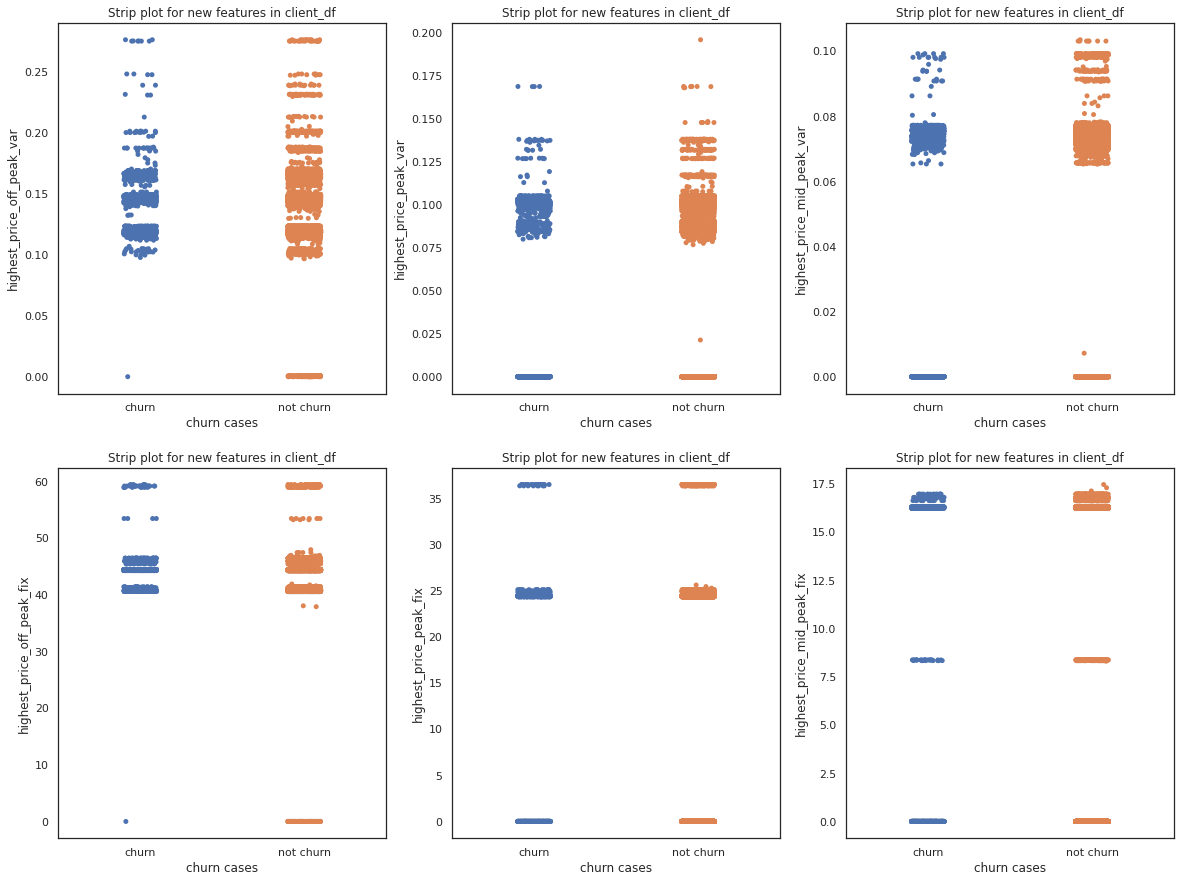

In [ ]:
fig=plt.figure(figsize=(20,15))
for i in range(len(client_df.columns[26:32])):
  dummy=pd.DataFrame()
  dummy['churn cases']=client_df['churn'].apply(lambda x:'churn' if x==1 else 'not churn')
  dummy[client_df.columns[i+26]]=client_df[client_df.columns[i+26]]
  plt.subplot(2,3,i+1)
  sns.stripplot(x='churn cases',y=client_df.columns[i+26],jitter=True,data=dummy).set_title('Strip plot for new features in client_df')
plt.show()

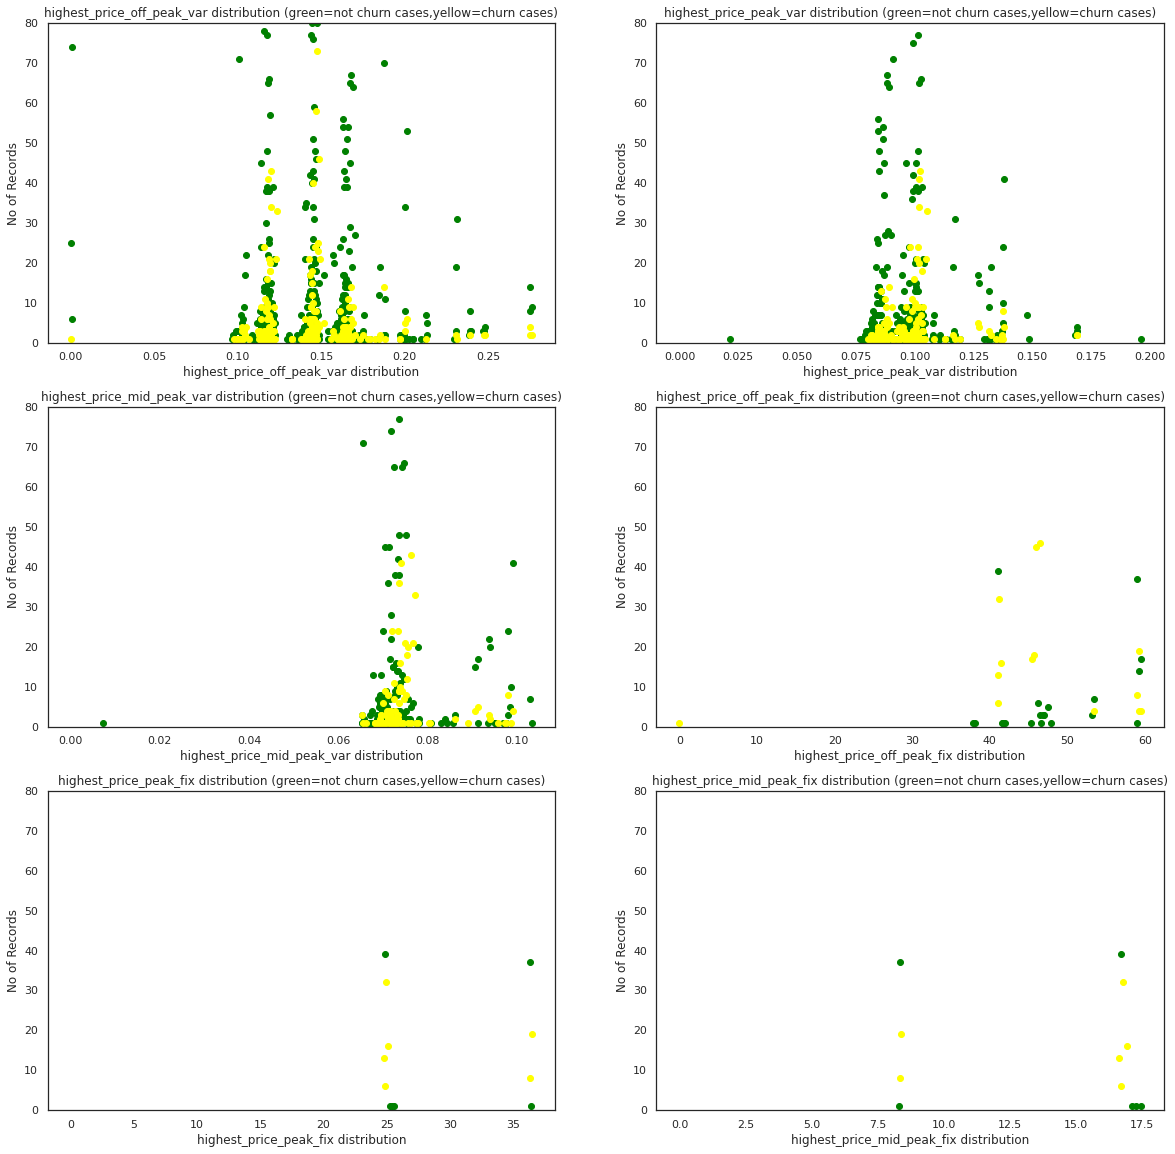

In [ ]:
fig=plt.figure(figsize=(20,20))
for i in range(len(client_df.columns[26:32])):
  plt.subplot(3,2,i+1)
  plt.scatter(client_df[client_df['churn']==0][client_df.columns[i+26]].value_counts().keys(),client_df[client_df['churn']==0][client_df.columns[i+26]].value_counts().values,color='green')
  plt.scatter(client_df[client_df['churn']==1][client_df.columns[i+26]].value_counts().keys(),client_df[client_df['churn']==1][client_df.columns[i+26]].value_counts().values,color='yellow')
  plt.ylim(0,80)
  plt.xlabel(client_df.columns[i+26]+' distribution')
  plt.ylabel('No of Records')
  plt.title(client_df.columns[i+26]+' distribution (green=not churn cases,yellow=churn cases)')
plt.show()

# Adding features present in price_analysis dataset to client dataset

In [ ]:
for i in price_analysis_dataset.columns[1:-1]:
  client_df[i]=price_analysis_dataset[i]

# Client dataset  after adding new features

In [ ]:
client_df

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,highest_price_mid_peak_fix,is First period Energy Price increased,is Second Period Energy Price increased,is Third Period Energy Price increased,is First period power price increased,is Second period power price increased,is Third period power price increased,First period Energy Price Estimation Not Match,Second period Energy Price Estimation Not Match,First period Power Price Estimation Not Match
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000000,1,0,0,1,0,0,1,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0,0,0,1,0,0,1,0,1
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0,1,0,1,0,0,1,1,1
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0,0,0,1,0,0,1,0,1
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,16.291555,0,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,0.000000,0,0,0,1,0,0,1,0,1
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,8.367731,0,0,1,1,1,1,1,1,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,16.291555,0,0,1,1,1,1,1,1,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,0.000000,0,0,0,1,0,0,1,0,1


# Data Visualisation for newly added features in client dataset

# scaler plot of churn customers end year prices whose estimation prices not matched

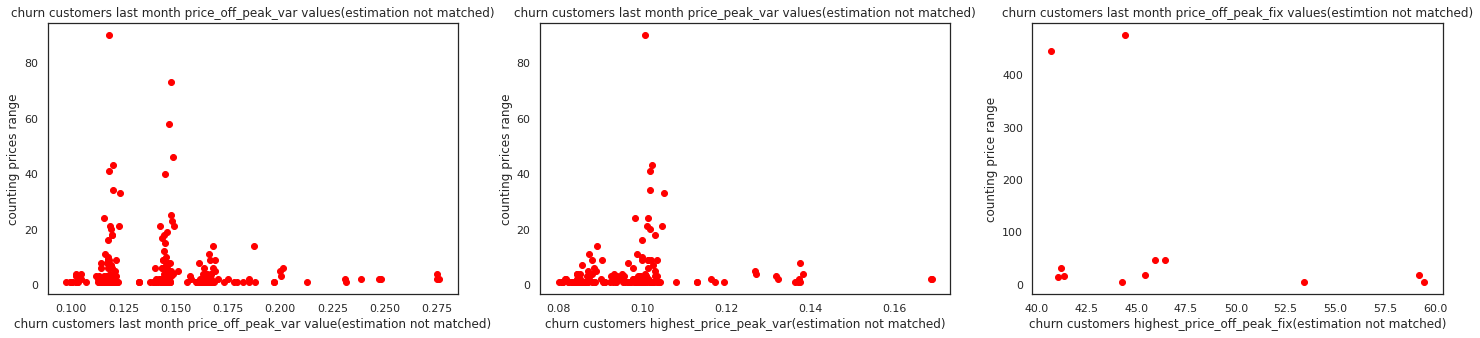

In [ ]:
fig=plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['First period Energy Price Estimation Not Match']==1)]['highest_price_off_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['First period Energy Price Estimation Not Match']==1)]['highest_price_off_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers last month price_off_peak_var value(estimation not matched)')
plt.ylabel('counting prices range')
plt.title('churn customers last month price_off_peak_var values(estimation not matched)')
plt.subplot(1,3,2)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['Second period Energy Price Estimation Not Match']==1)]['highest_price_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['Second period Energy Price Estimation Not Match']==1)]['highest_price_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers highest_price_peak_var(estimation not matched)')
plt.ylabel('counting prices range')
plt.title('churn customers last month price_peak_var values(estimation not matched)')
plt.subplot(1,3,3)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['First period Power Price Estimation Not Match']==1)]['highest_price_off_peak_fix'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['First period Power Price Estimation Not Match']==1)]['highest_price_off_peak_fix'].value_counts().values,color='red')
plt.xlabel('churn customers highest_price_off_peak_fix(estimation not matched)')
plt.ylabel('counting price range')
plt.title('churn customers last month price_off_peak_fix values(estimtion not matched)')
plt.show()

# Scaler plot of churn customers end year prices whose prices are increased at the end of the year

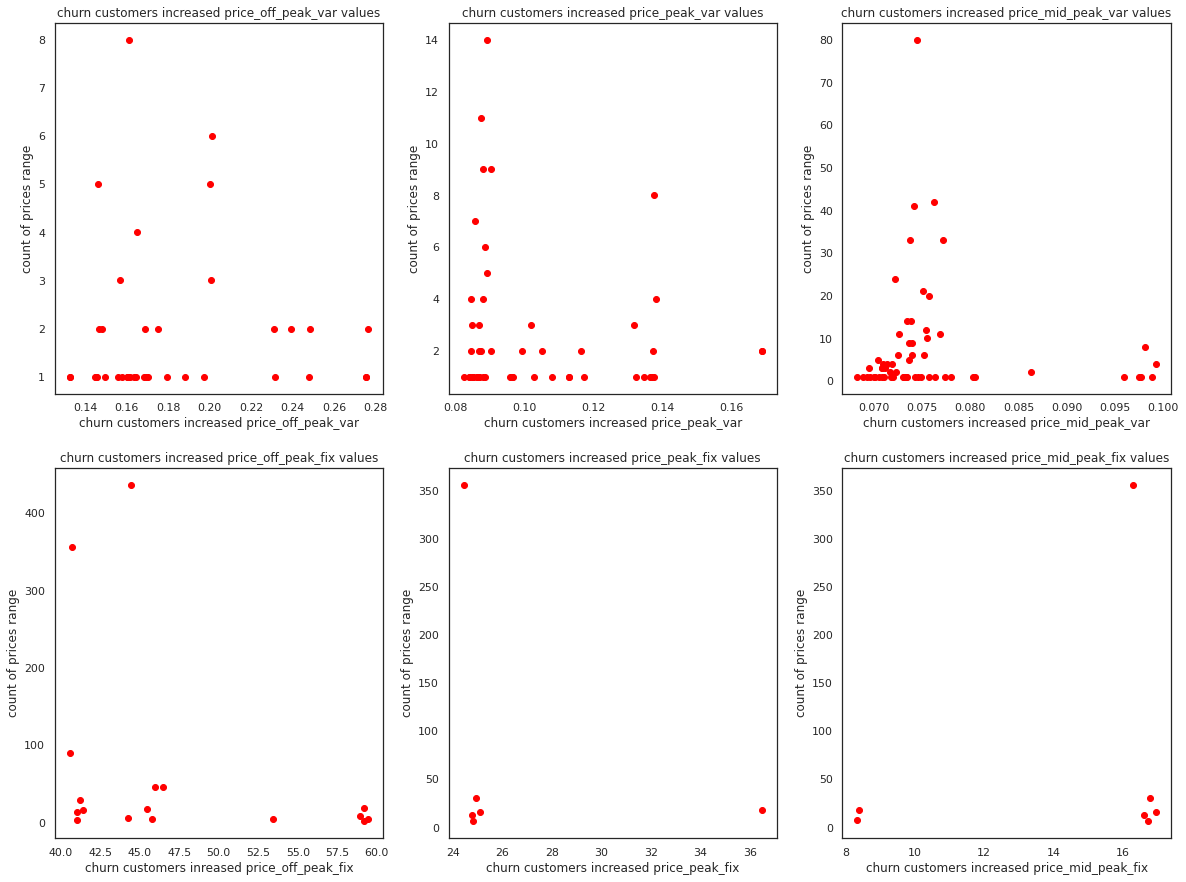

In [ ]:

fig=plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['is First period Energy Price increased']==1)]['highest_price_off_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['is First period Energy Price increased']==1)]['highest_price_off_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers increased price_off_peak_var')
plt.ylabel('count of prices range')
plt.title('churn customers increased price_off_peak_var values')
plt.subplot(2,3,2)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['is Second Period Energy Price increased']==1)]['highest_price_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['is Second Period Energy Price increased']==1)]['highest_price_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers increased price_peak_var')
plt.ylabel('count of prices range')
plt.title('churn customers increased price_peak_var values')
plt.subplot(2,3,3)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['is Third Period Energy Price increased']==1)]['highest_price_mid_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['is Third Period Energy Price increased']==1)]['highest_price_mid_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers increased price_mid_peak_var')
plt.ylabel('count of prices range')
plt.title('churn customers increased price_mid_peak_var values')
plt.subplot(2,3,4)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['is First period power price increased']==1)]['highest_price_off_peak_fix'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['is First period power price increased']==1)]['highest_price_off_peak_fix'].value_counts().values,color='red')
plt.xlabel('churn customers inreased price_off_peak_fix')
plt.ylabel('count of prices range')
plt.title('churn customers increased price_off_peak_fix values')
plt.subplot(2,3,5)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['is Second period power price increased']==1)]['highest_price_peak_fix'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['is Second period power price increased']==1)]['highest_price_peak_fix'].value_counts().values,color='red')
plt.xlabel('churn customers increased price_peak_fix')
plt.ylabel('count of prices range')
plt.title('churn customers increased price_peak_fix values')
plt.subplot(2,3,6)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['is Third period power price increased']==1)]['highest_price_mid_peak_fix'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['is Third period power price increased']==1)]['highest_price_mid_peak_fix'].value_counts().values,color='red')
plt.xlabel('churn customers increased price_mid_peak_fix')
plt.ylabel('count of prices range')
plt.title('churn customers increased price_mid_peak_fix values')
plt.show()

# Scaler plot of churn customers end year prices whose prices are increased at the end of the year and estimation not matched

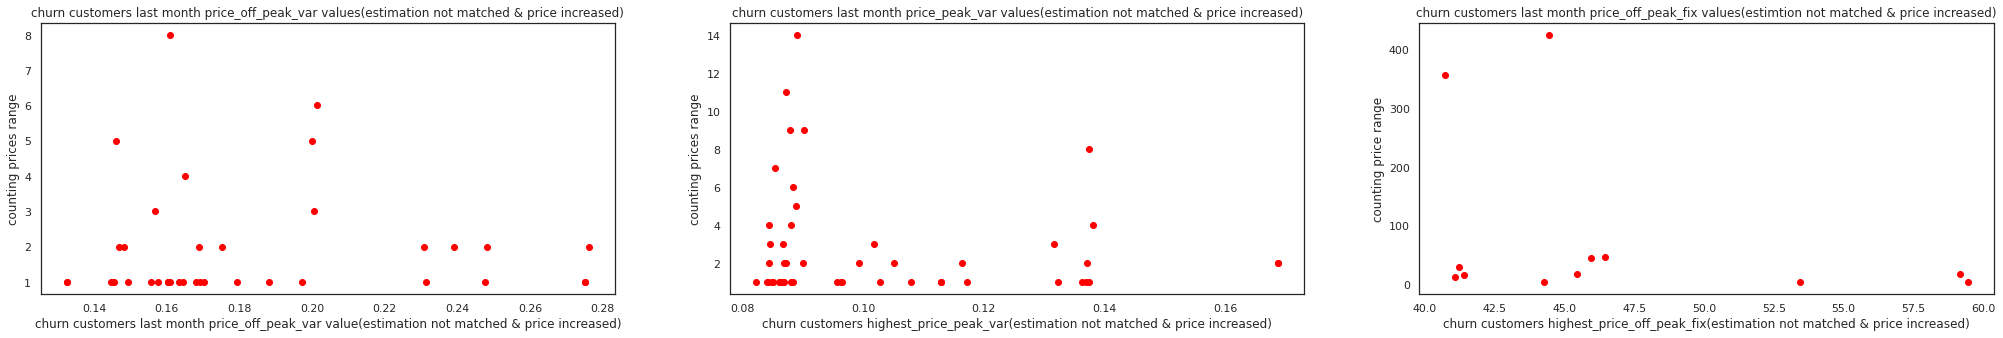

In [ ]:
fig=plt.figure(figsize=(35,5))
plt.subplot(1,3,1)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['First period Energy Price Estimation Not Match']==1)&(client_df['is First period Energy Price increased']==1)]['highest_price_off_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['First period Energy Price Estimation Not Match']==1)&(client_df['is First period Energy Price increased']==1)]['highest_price_off_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers last month price_off_peak_var value(estimation not matched & price increased)')
plt.ylabel('counting prices range')
plt.title('churn customers last month price_off_peak_var values(estimation not matched & price increased)')
plt.subplot(1,3,2)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['Second period Energy Price Estimation Not Match']==1)&(client_df['is Second Period Energy Price increased']==1)]['highest_price_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['Second period Energy Price Estimation Not Match']==1)&(client_df['is Second Period Energy Price increased']==1)]['highest_price_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers highest_price_peak_var(estimation not matched & price increased)')
plt.ylabel('counting prices range')
plt.title('churn customers last month price_peak_var values(estimation not matched & price increased)')
plt.subplot(1,3,3)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['First period Power Price Estimation Not Match']==1)&(client_df['is First period power price increased']==1)]['highest_price_off_peak_fix'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['First period Power Price Estimation Not Match']==1)&(client_df['is First period power price increased']==1)]['highest_price_off_peak_fix'].value_counts().values,color='red')
plt.xlabel('churn customers highest_price_off_peak_fix(estimation not matched & price increased)')
plt.ylabel('counting price range')
plt.title('churn customers last month price_off_peak_fix values(estimtion not matched & price increased)')
plt.show()

# Comparison of churn customers end year prices based on
# 1. whose end year prices increased
# 2. whose end year prices increased as well as estimated prices not matched

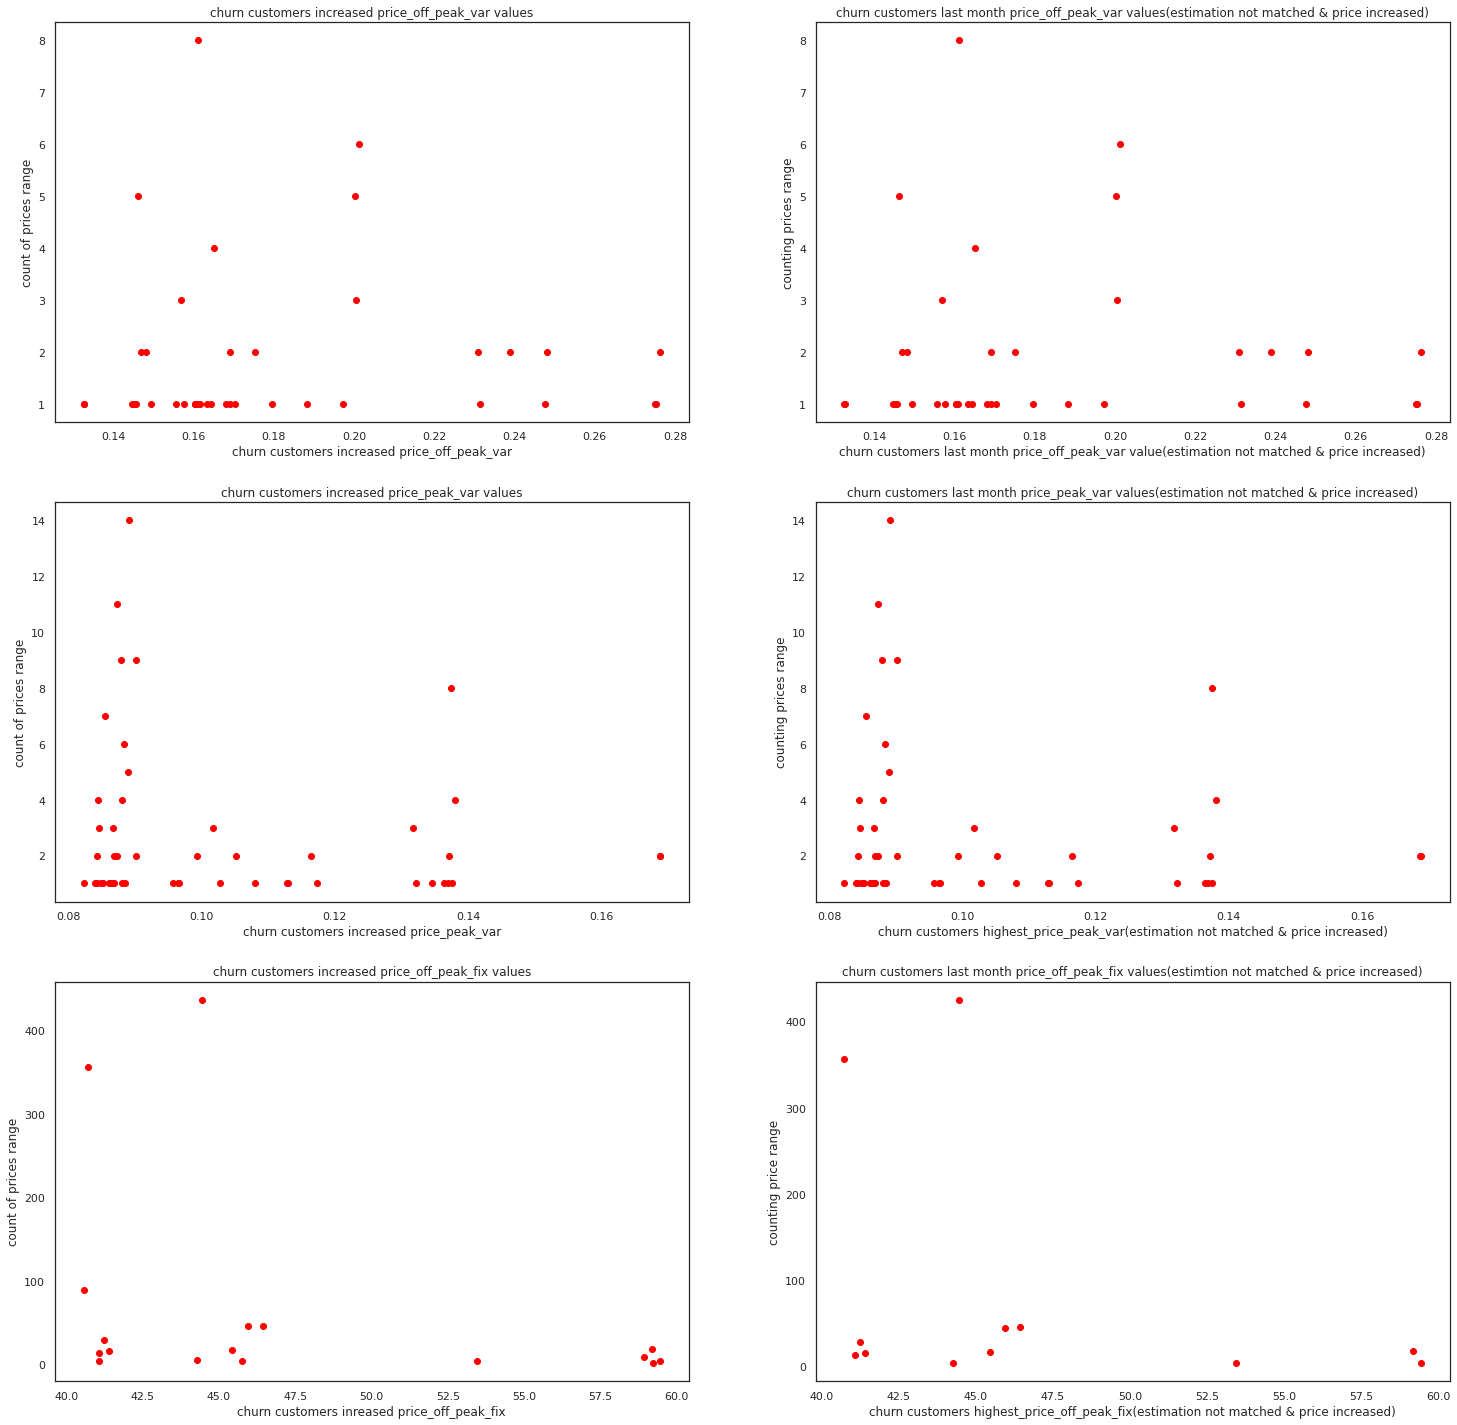

In [ ]:
fig=plt.figure(figsize=(25,25))
plt.subplot(3,2,1)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['is First period Energy Price increased']==1)]['highest_price_off_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['is First period Energy Price increased']==1)]['highest_price_off_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers increased price_off_peak_var')
plt.ylabel('count of prices range')
plt.title('churn customers increased price_off_peak_var values')
plt.subplot(3,2,2)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['First period Energy Price Estimation Not Match']==1)&(client_df['is First period Energy Price increased']==1)]['highest_price_off_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['First period Energy Price Estimation Not Match']==1)&(client_df['is First period Energy Price increased']==1)]['highest_price_off_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers last month price_off_peak_var value(estimation not matched & price increased)')
plt.ylabel('counting prices range')
plt.title('churn customers last month price_off_peak_var values(estimation not matched & price increased)')
plt.subplot(3,2,3)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['is Second Period Energy Price increased']==1)]['highest_price_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['is Second Period Energy Price increased']==1)]['highest_price_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers increased price_peak_var')
plt.ylabel('count of prices range')
plt.title('churn customers increased price_peak_var values')
plt.subplot(3,2,4)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['Second period Energy Price Estimation Not Match']==1)&(client_df['is Second Period Energy Price increased']==1)]['highest_price_peak_var'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['Second period Energy Price Estimation Not Match']==1)&(client_df['is Second Period Energy Price increased']==1)]['highest_price_peak_var'].value_counts().values,color='red')
plt.xlabel('churn customers highest_price_peak_var(estimation not matched & price increased)')
plt.ylabel('counting prices range')
plt.title('churn customers last month price_peak_var values(estimation not matched & price increased)')
plt.subplot(3,2,5)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['is First period power price increased']==1)]['highest_price_off_peak_fix'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['is First period power price increased']==1)]['highest_price_off_peak_fix'].value_counts().values,color='red')
plt.xlabel('churn customers inreased price_off_peak_fix')
plt.ylabel('count of prices range')
plt.title('churn customers increased price_off_peak_fix values')
plt.subplot(3,2,6)
plt.scatter(client_df[(client_df['churn']==1)&(client_df['First period Power Price Estimation Not Match']==1)&(client_df['is First period power price increased']==1)]['highest_price_off_peak_fix'].value_counts().keys(),client_df[(client_df['churn']==1)&(client_df['First period Power Price Estimation Not Match']==1)&(client_df['is First period power price increased']==1)]['highest_price_off_peak_fix'].value_counts().values,color='red')
plt.xlabel('churn customers highest_price_off_peak_fix(estimation not matched & price increased)')
plt.ylabel('counting price range')
plt.title('churn customers last month price_off_peak_fix values(estimtion not matched & price increased)')
plt.show()